## 抓資料

In [ ]:
# Download kaggle data in Google Colab 上傳kaggle json
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ming0923","key":"dfc248711adcb0a771fdb44d7ad3726e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'mohamedbakhet/amazon-books-reviews'

100% 1.06G/1.06G [00:42<00:00, 17.1MB/s]
100% 1.06G/1.06G [00:42<00:00, 27.0MB/s]


In [ ]:
# 建立一個資料夾
! mkdir book_data 

In [ ]:
# 將剛剛載下來的.zip壓縮檔解壓縮進book_data 資料夾裡
! unzip /content/amazon-books-reviews.zip -d book_data

Archive:  /content/amazon-books-reviews.zip
  inflating: book_data/Books_rating.csv  
  inflating: book_data/books_data.csv  


## Data pre

In [ ]:
import pandas as pd
import numpy as np
BR = pd.read_csv('/content/book_data/Books_rating.csv')
BR.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
BR.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561886
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
dtype: int64

In [ ]:
BR = BR.dropna()

In [ ]:
BR.isnull().sum()

Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [32]:
BR.info()
#剩414548

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414548 entries, 10 to 2999988
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  414548 non-null  object 
 1   Title               414548 non-null  object 
 2   Price               414548 non-null  float64
 3   User_id             414548 non-null  object 
 4   profileName         414548 non-null  object 
 5   review/helpfulness  414548 non-null  object 
 6   review/score        414548 non-null  float64
 7   review/time         414548 non-null  int64  
 8   review/summary      414548 non-null  object 
 9   review/text         414548 non-null  object 
 10  tokenized_text      142848 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 54.1+ MB


### 分詞

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#BR['tokenized_text'] = None
from itertools import chain

for index, row in BR.iterrows():

  # 如果tokenized_text已有值，跳過當前迭代
  if pd.notna(BR.at[index, 'tokenized_text']):
    print("已經有值了")
    continue

  df_rating_review_text = row['review/text']
  sentences = nltk.sent_tokenize(df_rating_review_text)
  tokens = [nltk.tokenize.word_tokenize(sent) for sent in sentences]
  # 將嵌套列表轉換為單個列表
  merged_tokens = list(chain.from_iterable(tokens))
  
  #放回dataframe
  BR.at[index, 'tokenized_text'] = merged_tokens

  # 每次迴圈結束時按順序打印數字
  print(index + 1)

## 匯出csv

In [46]:
BR.to_csv('/content/book_data/BR.csv')

## peep

In [36]:
BR.tail()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,tokenized_text
2999953,0786182431,Very Bad Deaths: Library Edition,90.00,A1EC8SNPR56CLU,Denis Dube,0/0,4.0,1285804800,It's the way he writes it,"""Very Bad Death"" is a so so story, but the cha...","[``, Very, Bad, Death, '', is, a, so, so, stor..."
2999954,0786182431,Very Bad Deaths: Library Edition,90.00,A33VKWCAV9QQKC,"Paige E. Steadman ""RuneEnigma""",0/0,5.0,1230249600,"Bad Deaths, Great Book!",Very Bad Deaths was a very great book! Spider ...,"[Very, Bad, Deaths, was, a, very, great, book,..."
2999955,0786182431,Very Bad Deaths: Library Edition,90.00,A2PK3NTC9RMEF4,S. Potter,0/0,3.0,1179705600,Still read it.,Anything by Spider Robinson is worth reading. ...,"[Anything, by, Spider, Robinson, is, worth, re..."
2999956,0786182431,Very Bad Deaths: Library Edition,90.00,A2D0PY6HIGTYIT,"Adrian in Phoenix ""No Time for Fantasy""",5/8,5.0,1111276800,Not another Callahan story,Great novel! Easy & enjoyable to read straight...,"[Great, novel, !, Easy, &, enjoyable, to, read..."
2999988,0255364520,An End to Welfare Rights: The Rediscovery of I...,18.95,A25JH6CO4DVINS,Junglies,0/0,4.0,1045526400,Heaven helps those who help themselves.,Another book on welfare reform. Dr. Green invo...,"[Another, book, on, welfare, reform, ., Dr., G..."


## 情感分析

In [43]:
from textblob import TextBlob

text = BR["review/text"][2999953]

# 使用TextBlob進行情感分析
blob = TextBlob(text)
sentiment = blob.sentiment

# 情感分析結果包含兩個值：極性和主觀性
# 極性：介於-1（負面情感）和1（正面情感）之間的值
# 主觀性：介於0（客觀）和1（主觀）之間的值
polarity, subjectivity = sentiment

print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")


#這兩個值分別代表了情感分析結果的兩個方面：

#Polarity (極性)：這是一個介於 -1 和 1 之間的值，用於衡量文本的情感。極性值越接近 -1，表示情感越負面；
#極性值越接近 1，表示情感越正面；極性值接近 0 表示文本具有中性情感。在這個例子中，極性值為 0.155，意味著文本具有輕微正面情感。

#Subjectivity (主觀性)：這是一個介於 0 和 1 之間的值，用於衡量文本的主觀性。主觀性值越接近 0，表示文本越客觀；
#主觀性值越接近 1，表示文本越主觀。在這個例子中，主觀性值為 0.702，意味著文本具有相對較高的主觀性。

#綜上所述，在此示例中，文本具有輕微正面情感和較高的主觀性。

Polarity: 0.15500000000000003, Subjectivity: 0.7020833333333334


找出評論數超過50的書

In [80]:
BR_up50 = BR.groupby('Title').filter(lambda x: len(x) > 50)
BR_up50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145021 entries, 4890 to 2998162
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  145021 non-null  object 
 1   Title               145021 non-null  object 
 2   Price               145021 non-null  float64
 3   User_id             145021 non-null  object 
 4   profileName         145021 non-null  object 
 5   review/helpfulness  145021 non-null  object 
 6   review/score        145021 non-null  float64
 7   review/time         145021 non-null  int64  
 8   review/summary      145021 non-null  object 
 9   review/text         145021 non-null  object 
 10  tokenized_text      145021 non-null  object 
 11  polarity            145021 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 14.4+ MB


計算他們的正面情感分數

In [81]:
# 計算每條評論的情感分數
BR_up50['polarity'] = BR_up50['review/text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 計算每個書籍ID的平均情感分數
mean_polarity = BR_up50.groupby('Title')['polarity'].mean()

# 找出具有最高正面情感分數的前五個書籍
top_5_positive_books = mean_polarity.nlargest(5)

print(top_5_positive_books)

Title
Lilla Belle: The First Stages                                                                                                         0.429015
Egg Money Quilts: 1930's Vintage Samplers                                                                                             0.415744
Paula Deen's Kitchen Classics: The Lady & Sons Savannah Country Cookbook and The Lady & Sons, Too!                                    0.388078
A Child's Introduction to the Night Sky: The Story of the Stars, Planets, and Constellations--and How You Can Find Them in the Sky    0.383865
Owen & Mzee: The True Story of a Remarkable Friendship                                                                                0.381875
Name: polarity, dtype: float64


匯入book data

In [ ]:
BD = pd.read_csv('/content/book_data/books_data.csv')
BD.head()

In [88]:
# 將 Pandas Series 轉換為 DataFrame
top_polarity_df = top_5_positive_books.to_frame().reset_index()

# 重新命名 DataFrame 中的列
top_polarity_df.columns = ['Title', 'polarity']

top_polarity_df

,Title,polarity
0,Lilla Belle: The First Stages,0.429015
1,Egg Money Quilts: 1930's Vintage Samplers,0.415744
2,Paula Deen's Kitchen Classics: The Lady & Sons...,0.388078
3,A Child's Introduction to the Night Sky: The S...,0.383865
4,Owen & Mzee: The True Story of a Remarkable Fr...,0.381875


讓我們看看是哪五本書正面情感最好

In [89]:
# 创建一个列表，包含 top_polarity_df 中的所有书名
top_titles = top_polarity_df['Title'].tolist()

# 使用 isin() 函数筛选 original_df 中的匹配行
filtered_df = BD[BD['Title'].isin(top_titles)]

filtered_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
21943,Owen & Mzee: The True Story of a Remarkable Fr...,"Owen had a fuzzy yellow blanket. ""Fuzzy goes w...",['Kevin Henkes'],http://books.google.com/books/content?id=i9WXS...,http://books.google.com/books?id=i9WXSoL5PN0C&...,Harper Collins,1993-09-15,http://books.google.com/books?id=i9WXSoL5PN0C&...,['Juvenile Fiction'],56.0
28278,Lilla Belle: The First Stages,"In this deeply touching tear-jerker, Michelle ...",['Michelle Cole'],http://books.google.com/books/content?id=YkVfe...,http://books.google.com/books?id=YkVfeN-xC8wC&...,Write World,2003-02-01,http://books.google.com/books?id=YkVfeN-xC8wC&...,['Fiction'],1.0
73916,Egg Money Quilts: 1930's Vintage Samplers,Presents instructions for creating thirteen tr...,['Eleanor Burns'],http://books.google.com/books/content?id=LsbxO...,http://books.google.com/books?id=LsbxOwAACAAJ&...,Quilt in a Day.,2005-10-01,http://books.google.com/books?id=LsbxOwAACAAJ&...,['Crafts & Hobbies'],NaN
166113,Paula Deen's Kitchen Classics: The Lady & Sons...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180777,A Child's Introduction to the Night Sky: The S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


書的封面

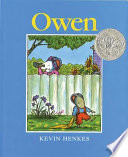

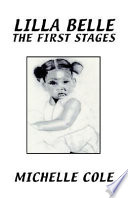

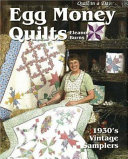

AttributeError: ignored

In [115]:
from PIL import Image
import urllib.request

for i in filtered_df['image']:

  # 選擇要顯示的圖像URL
  image_url = i

  # 從URL下載並顯示圖像
  with urllib.request.urlopen(image_url) as url:
      img = Image.open(url)
      img.show()


負面情感

In [121]:
# 找出具有最高正面情感分數的前五個書籍
top_5_negative_books = mean_polarity.nsmallest(5)
print(top_5_negative_books)
# 將 Pandas Series 轉換為 DataFrame
top_5_negative_books_df = top_5_negative_books.to_frame().reset_index()

# 重新命名 DataFrame 中的列
top_5_negative_books_df.columns = ['Title', 'polarity']

# 创建一个列表，包含 top_polarity_df 中的所有书名
top_negative_titles = top_5_negative_books_df['Title'].tolist()

# 使用 isin() 函数筛选 original_df 中的匹配行
filtered_negative_df = BD[BD['Title'].isin(top_negative_titles)]

filtered_negative_df

Title
Without Sanctuary: Lynching Photography in America                                                 0.002111
The Anger Workbook: A 13-Step Interactive Plan to Help You... (Minirth-Meier Clinic Series)        0.002212
Predator (Kay Scarpetta Mysteries)                                                                 0.028075
Invasion: How America Still Welcomes Terrorists Criminals & Other Foreign Menaces to Our Shores    0.031652
The Secret Agent                                                                                   0.036612
Name: polarity, dtype: float64


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
2917,The Anger Workbook: A 13-Step Interactive Plan...,"""We all deal with anger in our lives, whether ...","['Les Carter', 'Frank B. Minirth']",http://books.google.com/books/content?id=t0viY...,http://books.google.nl/books?id=t0viYFXTNmUC&p...,Thomas Nelson Inc,2012,http://books.google.nl/books?id=t0viYFXTNmUC&d...,['Religion'],12.0
47879,The Secret Agent,"One of the great detective novels of all time,...",['Joseph Conrad'],http://books.google.com/books/content?id=V8vrX...,http://books.google.com/books?id=V8vrXfAiPRUC&...,Penguin,1990,http://books.google.com/books?id=V8vrXfAiPRUC&...,['Fiction'],4.0
148027,Invasion: How America Still Welcomes Terrorist...,Malkin exposes how America continues to welcom...,['Michelle Malkin'],http://books.google.com/books/content?id=tfbL0...,http://books.google.com/books?id=tfbL00C5DpIC&...,Simon and Schuster,2013-02-05,https://play.google.com/store/books/details?id...,['Political Science'],1.0
154089,Without Sanctuary: Lynching Photography in Ame...,"Frequently reissued with the same ISBN, but wi...","['James Allen', 'Twin Palms Publishers', 'Hilt...",http://books.google.com/books/content?id=q4faA...,http://books.google.com/books?id=q4faAAAAMAAJ&...,Twin Palms Pub,2000,http://books.google.com/books?id=q4faAAAAMAAJ&...,['Photography'],5.0
207153,Predator (Kay Scarpetta Mysteries),Kay Scarpetta and her colleague Pete Marino in...,['Patricia Daniels Cornwell'],http://books.google.com/books/content?id=Aaebu...,http://books.google.com/books?id=AaebuAAACAAJ&...,Berkley,2012,http://books.google.com/books?id=AaebuAAACAAJ&...,['Fiction'],NaN


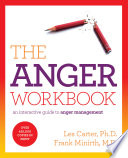

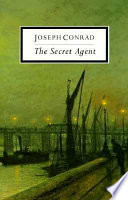

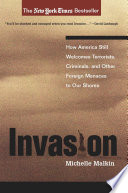

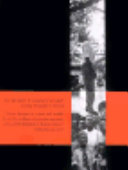

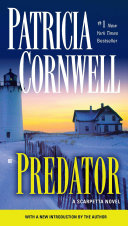

In [119]:
for i in filtered_negative_df['image']:

  # 選擇要顯示的圖像URL
  image_url = i

  # 從URL下載並顯示圖像
  with urllib.request.urlopen(image_url) as url:
      img = Image.open(url)
      img.show()

## tf-idf

In [50]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise','brown']
labels = BR['review/score'].value_counts().keys().map(str)
values = BR['review/score'].value_counts()/BR['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.show()

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
# 使用TF-IDF向量化
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
X = vectorizer.fit_transform(BR['review/text'])

# X是TF-IDF矩陣，其中每一行表示一個文本，每一列表示一個單詞
# 這個矩陣可以用於後續的文本分析、分類等任務

# 假設您有一個目標列，例如review/score
y = BR['review/score']

# 使用卡方檢驗選擇最具影響力的K個特徵
k = 20  # 可根據需要更改
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)

# 獲取最具影響力的單詞
top_words_indices = selector.get_support(indices=True)
top_words = [vectorizer.get_feature_names_out()[index] for index in top_words_indices]

print("Top", k, "important words:")
print(top_words)


Top 20 important words:
['bad', 'bit', 'boring', 'didn', 'disappointed', 'disappointing', 'disappointment', 'errors', 'good', 'great', 'highly', 'money', 'ok', 'poorly', 'trash', 'unfortunately', 'useless', 'waste', 'wonderful', 'worst']


In [61]:
# 創建一個新的DataFrame，只包含review/score等於5.0的行
df_score_5 = BR[BR['review/score'] == 5.0]

# 使用TF-IDF向量化
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
X_score_5 = vectorizer.fit_transform(df_score_5['review/text'])

# 計算每個單詞的平均TF-IDF值
tfidf_means = X_score_5.mean(axis=0)

# 選擇最重要的K個單詞
k = 10
top_indices = tfidf_means.argsort()[::-1][:k]
top_words = [vectorizer.get_feature_names_out()[index] for index in top_indices]

print("Top", k, "important words for review/score = 5.0:")
print(top_words)

Top 10 important words for review/score = 5.0:
[array([['jehoiachin', 'identy', 'enterally', ..., 'great', 'read',
        'book']], dtype=object)]


In [62]:
# 創建一個新的DataFrame，只包含review/score等於1.0的行
df_score_1 = BR[BR['review/score'] == 1.0]

# 使用TF-IDF向量化
vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.95)
X_score_1 = vectorizer.fit_transform(df_score_1['review/text'])

# 計算每個單詞的平均TF-IDF值
tfidf_means = X_score_1.mean(axis=0)

# 選擇最重要的K個單詞
k = 10
top_indices = tfidf_means.argsort()[::-1][:k]
top_words = [vectorizer.get_feature_names_out()[index] for index in top_indices]

print("Top", k, "important words for review/score = 1.0:")
print(top_words)

Top 10 important words for review/score = 1.0:
[array([['penetration', 'whinebag', 'jess', ..., 'just', 'read', 'book']],
      dtype=object)]
